### Description: In this script we will be visualizing some historical flood events (2020) in Kenya using Google Flood Hub's historical reanalysis discharge data. 

###### Code is adapted from the following tutorial https://colab.research.google.com/drive/1FnXXSEQqU1TJhMPiNeWUTr9LnbJwZzMm?usp=sharing#scrollTo=UTbokLLWp_9o

#### Step 1: Import Libraries

In [6]:
import datetime
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gcsfs

#### Step 2: Load Files

In [7]:
# Function for opening zarr datasets
def open_zarr(path):
  return xr.open_zarr(
      store=path,
      chunks=None,
      storage_options=dict(token='anon')
      )

In [8]:
# Set file paths
base_directory = 'gs://flood-forecasting/hydrologic_predictions/model_id_8583a5c2_v0/'
reanalysis_path = os.path.join(base_directory, 'reanalysis/streamflow.zarr/')
return_periods_path = os.path.join(base_directory, 'return_periods.zarr/')

In [9]:
# Load files
reanalysis_ds = open_zarr(reanalysis_path)
return_periods_ds = open_zarr(return_periods_path)
print(f'{reanalysis_ds.sizes = }')
print(f'{return_periods_ds.sizes = }')

reanalysis_ds.sizes = Frozen({'gauge_id': 1031646, 'time': 16063})
return_periods_ds.sizes = Frozen({'gauge_id': 1031646})


#### Step 3: Load for a HydroBasin

In [10]:
hybas_id = "hybas_1121172940" # Nairobi, Kenya (containing Kibera)
gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id=hybas_id).compute()
gauge_return_periods_ds = return_periods_ds.sel(gauge_id=hybas_id).compute()

#### Step 4: Plots

##### Plotting functions

In [11]:
def add_thresholds(ax, gauge_return_periods_ds, thresholds):
  colors = ('yellow', 'orange', 'red', 'brown', 'black')
  for threshold, color in zip(thresholds, colors):
    ax.axhline(
      y=gauge_return_periods_ds[f'return_period_{threshold}'].item(), color=color, label=f'{threshold} year return period', linestyle='--'
    )

def plot_reanalysis(start_date, end_date, gauge_return_periods_ds, thresholds=('2', '5', '20', '50', '100')):
  fig, ax = plt.subplots(figsize=(15, 3))
  gauge_reanalysis_da = gauge_reanalysis_ds.streamflow.sel(time=slice(start_date, end_date))
  ax.plot(gauge_reanalysis_da.time, gauge_reanalysis_da.values)
  add_thresholds(ax, gauge_return_periods_ds, thresholds)
  plt.xlabel("Date")
  plt.ylabel("Streamflow")
  plt.legend(loc='upper left')
  plt.show()

##### Plot reanalysis

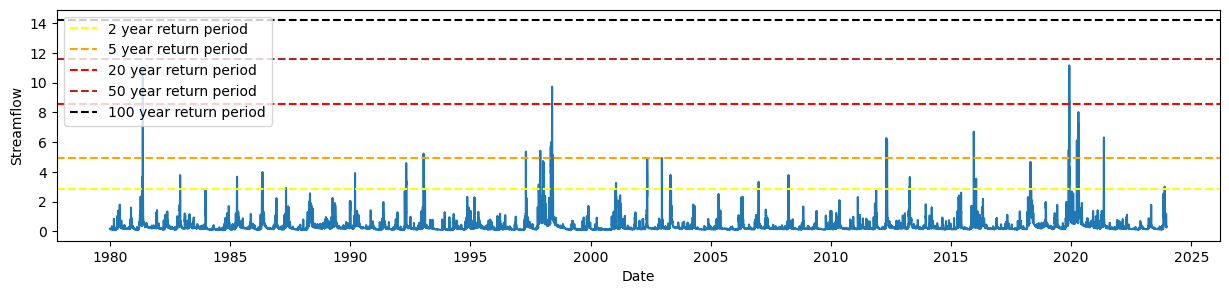

In [12]:
start_date = '1980-01-01'
end_date = '2023-12-31'

plot_reanalysis(start_date, end_date, gauge_return_periods_ds)